In [10]:
import pandas as pd
import numpy as np
def read_auto_data(fileName = "Automobile price data.csv"):
    'Funtion to load the auto price data set from a .csv file'
    #Read the .csv file with the pandas read_csv method
    auto_prices = pd.read_csv(fileName)
    #Remove rows with missing values, accounting for missing calues code as '?'
    cols = ['price', 'bore', 'stroke','horsepower', 'peak-rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column]  = np.nan
        auto_prices.dropna(axis = 0, inplace = True)
    ## Convert some columns to numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])
    #auto_prices[cols] = auto_prices[cols].as_type(int64)
    return auto_prices


In [13]:
auto_prices = read_auto_data()

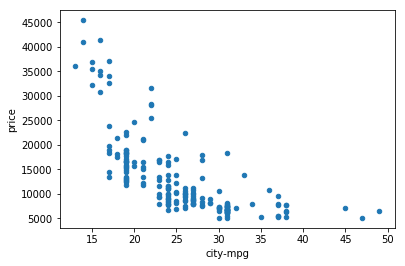

In [15]:
auto_prices.plot(kind='scatter',x='city-mpg',y='price')

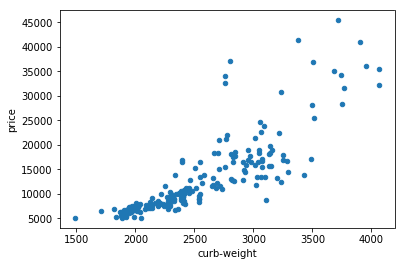

In [17]:
auto_prices.plot(kind='scatter',x='curb-weight',y='price')

Text(0,0.5,'Auto Price')

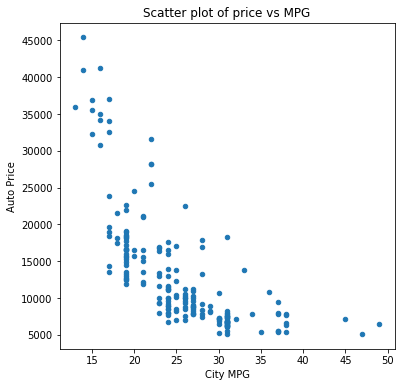

In [19]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(6,6)) # define 
ax = fig.gca()
auto_prices.plot(kind='scatter',x='city-mpg',y='price',ax=ax)
ax.set_title('Scatter plot of price vs MPG') # Give the plot a  main title 
ax.set_xlabel('City MPG') # Set text for the x axis 
ax.set_ylabel('Auto Price') # Set text for y axis

In [3]:
from bokeh.plotting import figure,output_file,show,save,ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.palettes import Blues8
from bokeh.embed import components 
import pandas

In [ ]:
df = read_csv('cars.csv')

In [ ]:
source = ColumnDataSource(df)

In [ ]:
output_file('index.html')

In [ ]:
car_list = sourcee.data['Car'].tolist()

In [ ]:
p = figure(y_range=car_list,plot_width=800,plot_height=600,title='Cars With Horsepower',x_axis_label='HorsePower',
          tools="pan,box_select,zoom_in,zoom_out,save,reset")

In [ ]:
hover = HoverTool()
hover.tooltips = """
<div> 
<h3>@Car</h3>
<div><strong> Price : </strong>@Price</div>
<div><strong> HP : </strong>@HorsePower</div>
<div><img src="@Image" alt="" width="200"/></div>
</div>
"""
p.add_tools(hover)

In [ ]:
show(p)

In [ ]:
import pandas as pd 
x = list(range(100))
y = [z*z for z in range(100)]

In [20]:
counts = auto_prices['make'].value_counts()
counts

toyota           32
nissan           18
mazda            13
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
alfa-romero       3
chevrolet         3
isuzu             2
mercury           1
Name: make, dtype: int64

Text(0,0.5,'Auto Price')

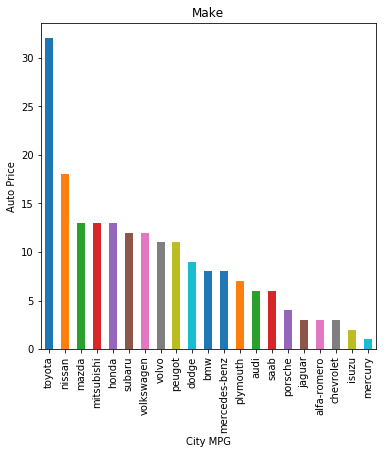

In [26]:
fig = plt.figure(figsize=(6,6)) # define 
ax = fig.gca()
counts.plot.bar()
ax.set_title('Make') # Give the plot a  main title 
ax.set_xlabel('City MPG') # Set text for the x axis 
ax.set_ylabel('Auto Price') # Set text for y axis

Text(0,0.5,'Engine Price')

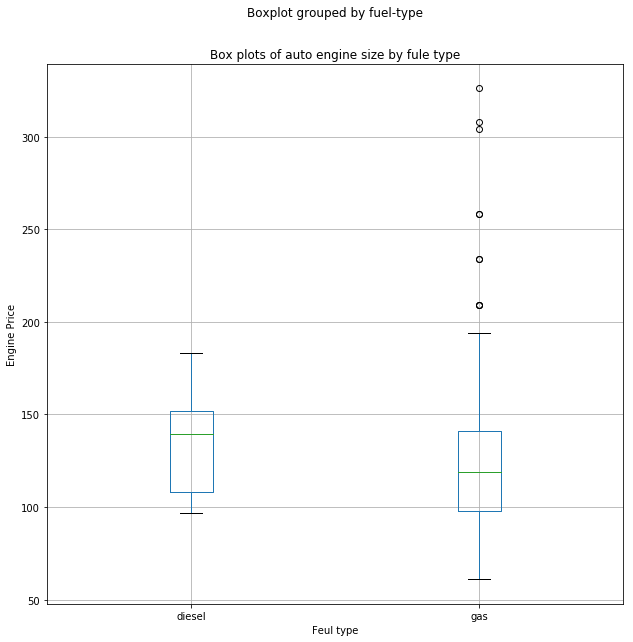

In [27]:
fig = plt.figure(figsize=(10,10)) # define plot area 
ax = fig.gca()
auto_prices[['engine-size','fuel-type']].boxplot(by = 'fuel-type',ax=ax)
# Use the plot.bar method on the new data frame 
ax.set_title('Box plots of auto engine size by fule type')
ax.set_xlabel('Feul type') # Set text for the x axis 
ax.set_ylabel('Engine Price') # Set text for y axis

C:\Users\aubert\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


''

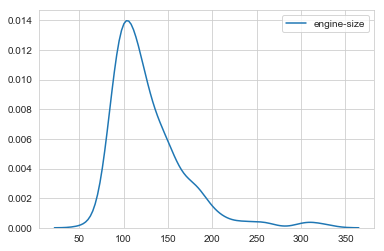

In [30]:
import seaborn as sns 
sns.set_style("whitegrid")
sns.kdeplot(auto_prices['engine-size']);

C:\Users\aubert\anaconda\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
C:\Users\aubert\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Price')

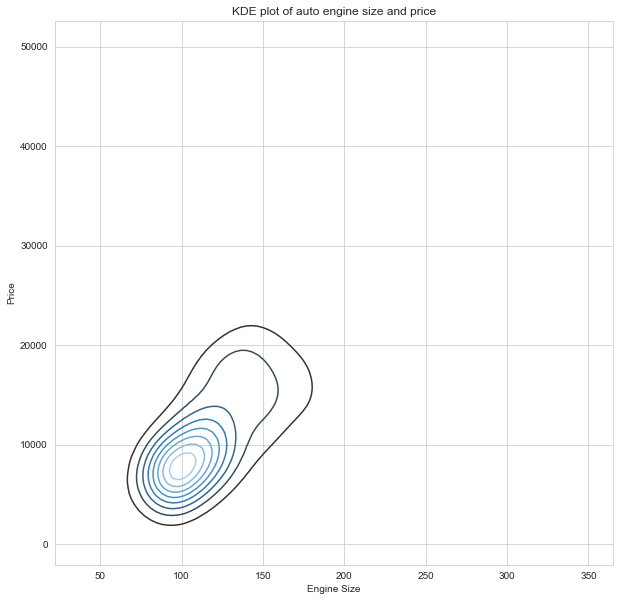

In [33]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
sns.set_style("whitegrid")
sns.kdeplot(auto_prices[['engine-size','price']],ax=ax,cmap="Blues_d")
ax.set_title('KDE plot of auto engine size and price')
ax.set_xlabel('Engine Size')
ax.set_ylabel('Price')

C:\Users\aubert\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


''

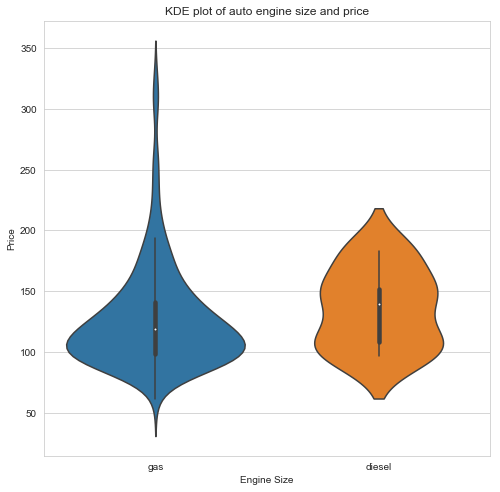

In [40]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
sns.set_style("whitegrid")
sns.violinplot(x='fuel-type',y='engine-size',data = auto_prices,cmap="Blues_d",ax=ax)
ax.set_title('KDE plot of auto engine size and price')
ax.set_xlabel('Engine Size')
ax.set_ylabel('Price')
;

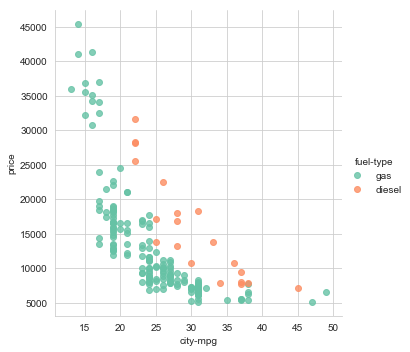

In [38]:
sns.lmplot(x='city-mpg',y='price',data = auto_prices,hue='fuel-type',palette="Set2",fit_reg=False);

''

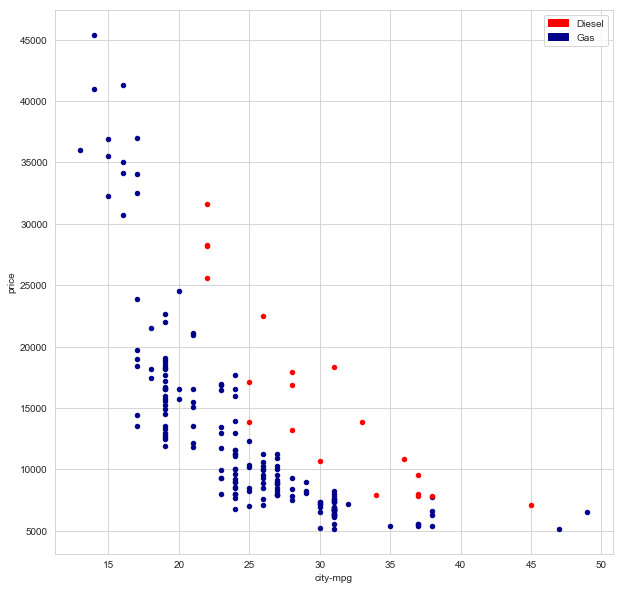

In [46]:
def auto_color(df,plot_cols):
    import matplotlib.pyplot as plt 
    import matplotlib.patches as mpatches 
    for col in plot_cols:
        fig = plt.figure(figsize=(10,10))
        ax = fig.gca()
        temp1 = df.loc[df['fuel-type'] == 'gas']
        temp2 = df.loc[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:
            temp1.plot(kind = 'scatter',x=col,y='price',
                      ax = ax, color='DarkBlue')
        if temp2.shape[0] > 0:
            temp2.plot(kind = 'scatter',x=col,y='price',
                      ax = ax, color='Red')
    ax.set_title('')
    red_patch = mpatches.Patch(color = 'Red',label='Diesel')
    blue_patch = mpatches.Patch(color = 'DarkBlue',label='Gas')
    plt.legend(handles = [red_patch,blue_patch])
    return 'Done'
auto_color(auto_prices,['city-mpg'])
;           

''

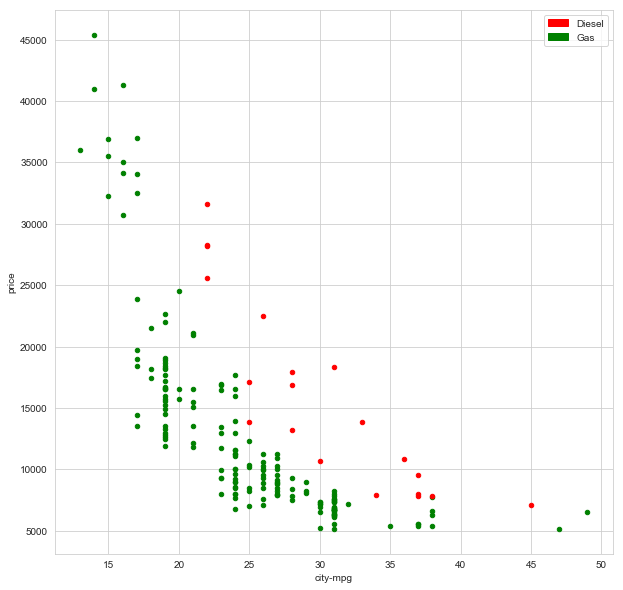

In [50]:
def auto_color(df,plot_cols):
    import matplotlib.pyplot as plt 
    import matplotlib.patches as mpatches 
    for col in plot_cols:
        fig = plt.figure(figsize=(10,10))
        ax = fig.gca()
        temp1 = df.loc[df['fuel-type'] == 'gas']
        temp2 = df.loc[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:
            temp1.plot(kind = 'scatter',x=col,y='price',
                      ax = ax, color='Green')
        if temp2.shape[0] > 0:
            temp2.plot(kind = 'scatter',x=col,y='price',
                      ax = ax, color='Red')
    ax.set_title('')
    red_patch = mpatches.Patch(color = 'Red',label='Diesel')
    blue_patch = mpatches.Patch(color = 'Green',label='Gas')
    plt.legend(handles = [red_patch,blue_patch])
    return 'Done'
auto_color(auto_prices,['city-mpg'])
;    

'Done'

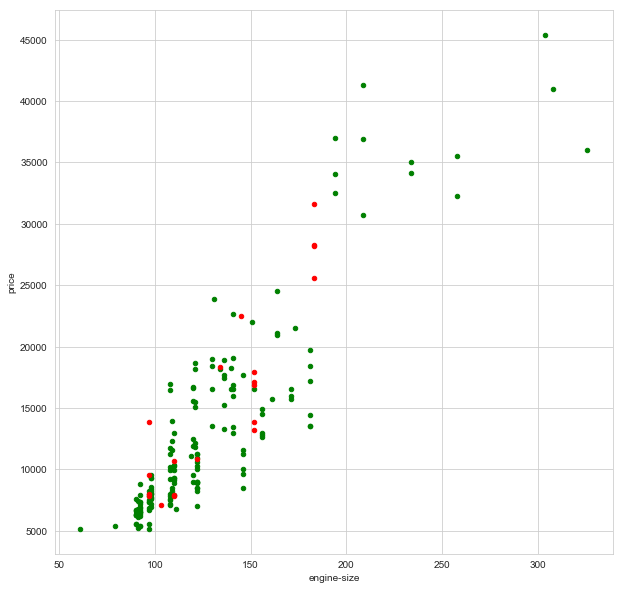

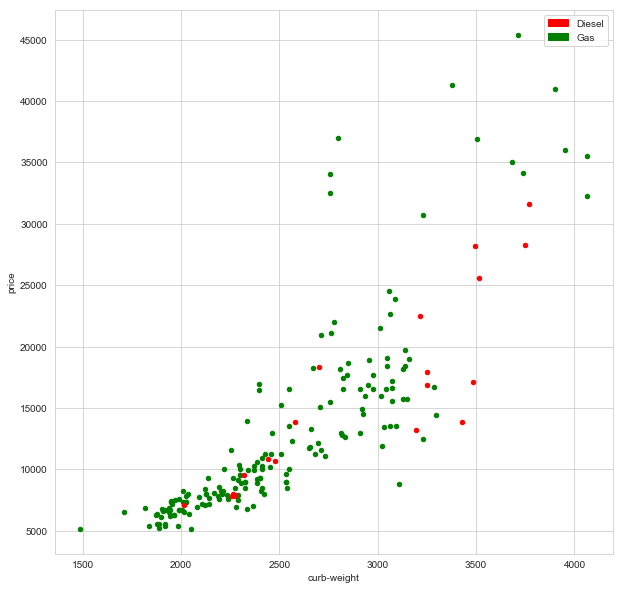

In [51]:
auto_color(auto_prices,['engine-size','curb-weight'])

'Done'

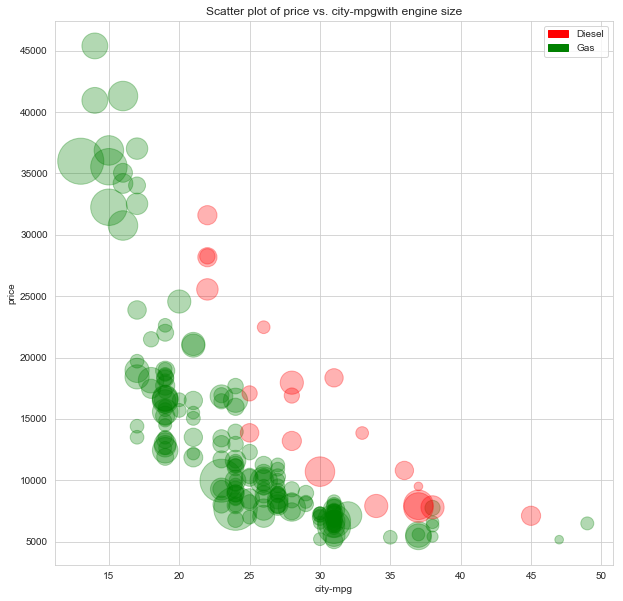

In [53]:
def auto_size_2(df,plot_cols):
    import matplotlib.pyplot as plt 
    import matplotlib.patches as mpatches 
    for col in plot_cols:
        fig = plt.figure(figsize=(10,10))
        ax = fig.gca()
        temp1 = df.loc[df['fuel-type'] == 'gas']
        temp2 = df.loc[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:
            temp1.plot(kind = 'scatter',x=col,y='price',
                      ax = ax, color='Green',s=.02*auto_prices['engine-size']*auto_prices['engine-size'],alpha=0.3)
        if temp2.shape[0] > 0:
            temp2.plot(kind = 'scatter',x=col,y='price',
                      ax = ax, color='Red',s=.02*auto_prices['engine-size']*auto_prices['engine-size'],alpha=0.3)
    ax.set_title('Scatter plot of price vs. ' + col + 'with engine size')
    red_patch = mpatches.Patch(color = 'Red',label='Diesel')
    blue_patch = mpatches.Patch(color = 'Green',label='Gas')
    plt.legend(handles = [red_patch,blue_patch])
    return 'Done'
auto_size_2(auto_prices,['city-mpg'])

C:\Users\aubert\anaconda\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


''

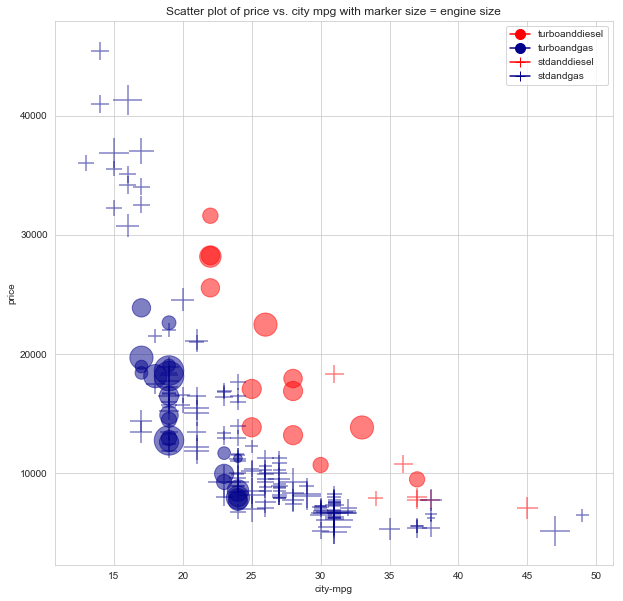

In [63]:
def auto_shape(df):
    import matplotlib.pyplot as plt
    import matplotlib.lines as mlines
    aspiration = ['turbo', 'turbo', 'std', 'std']
    fuel = ['diesel', 'gas', 'diesel', 'gas']
    mrks = ['o','o','+','+']
    cols = ['Red', 'DarkBlue', 'Red', 'DarkBlue']
    ldg = []
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca()
    for asp, fl, mk, cl in zip (aspiration, fuel, mrks, cols):
        temp = df.ix[(df['aspiration'] == asp) & (df['fuel-type'] == fl)]
        if temp.shape[0] > 0:
            temp.plot(kind='scatter', x = 'city-mpg', y = 'price',
                      ax = ax, color = cl, marker = mk, s= .02 * df['engine-size'] * df['engine-size'],
                      alpha = 0.5)
            ldg.append(mlines.Line2D([], [], color=cl, marker=mk, markersize=10,
                               label=(asp + 'and' + fl)))
    ax.set_title('Scatter plot of price vs. city mpg with marker size = engine size')
    plt.legend(handles=ldg)
    return 'Done'
auto_shape(auto_prices)
;
    

''

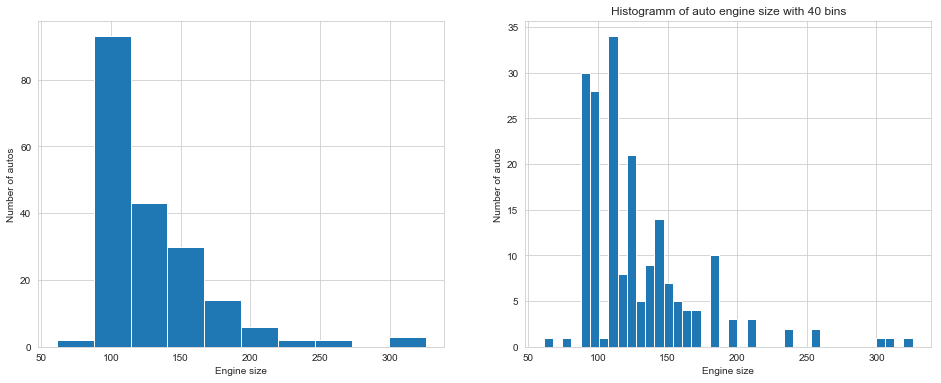

In [56]:
fig,ax =plt.subplots(1,2,figsize=(16,6))
auto_prices['engine-size'].plot.hist(ax= ax[0])
ax[0].set_xlabel('Engine size')
ax[0].set_ylabel('Number of autos')
auto_prices['engine-size'].plot.hist(ax =ax[1],bins=40)
ax[1].set_title('Histogramm of auto engine size with 40 bins')
ax[1].set_xlabel('Engine size')
ax[1].set_ylabel('Number of autos')
;

C:\Users\aubert\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


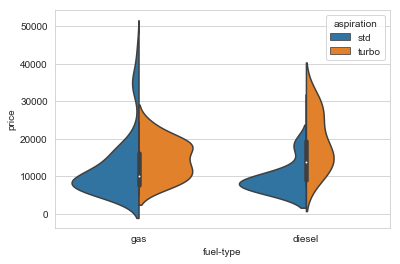

In [57]:
import seaborn as sns 
sns.set_style("whitegrid")
sns.violinplot(data = auto_prices,x = 'fuel-type',y='price',hue='aspiration',split=True)

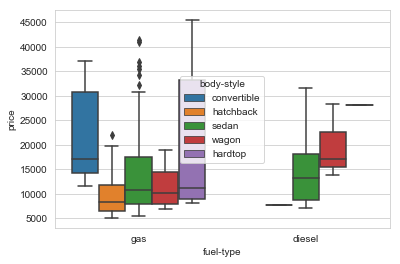

In [58]:
sns.set_style("whitegrid")
sns.boxplot(data = auto_prices,x = 'fuel-type',y='price',hue='body-style')

In [69]:
num_cols = ["length","curb-weight","engine-size","horsepower","city-mpg","price","fuel-type"]
sns.pairplot(auto_prices[num_cols],hue="fuel-type";palette="Set2",diag_kind="kde",size=2).map_upper(sns.kdeplot,cmap="Blues_d")

SyntaxError: invalid syntax (<ipython-input-69-f6f60db33295>, line 2)

C:\Users\aubert\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


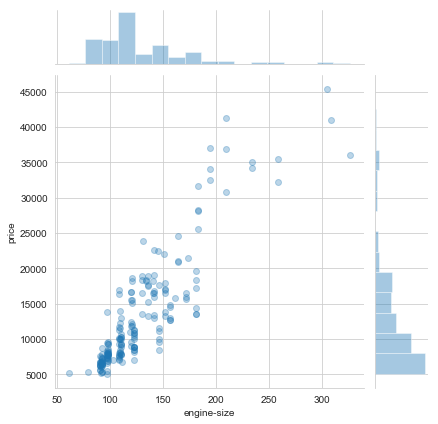

In [70]:
sns.set_style("whitegrid")
sns.jointplot('engine-size', 'price', data= auto_prices, alpha = 0.3)